## EDA (Exploratory Data Analysis)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style('whitegrid')

Carreguem el nostre dataset per veure com son les nostres dades i, posteriorment, veure les dimensions i el tipus de variables.

In [4]:
df = pd.read_csv("games.csv")
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
df = pd.read_csv("games.csv")
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


A continuació, mirem estadísticament les dades

In [7]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Analitzem ara la nostre variable target, el guanyador de la partida, per veure la seva distribució i per tant per veure també si està balancejada

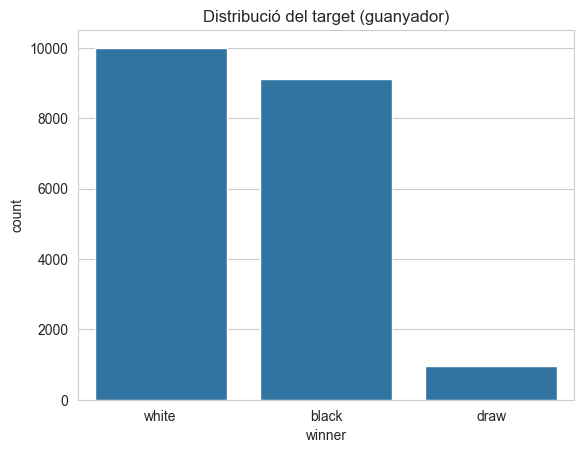

winner
white    0.498604
black    0.454033
draw     0.047363
Name: proportion, dtype: float64

In [8]:
sns.countplot(data=df, x="winner")
plt.title("Distribució del target (guanyador)")
plt.show()

df["winner"].value_counts(normalize=True)

Treiem els empats, ja que són molt pocs (menys del 5%). Per tant, simplificarem els models treient-los de la nostra base de dades i farem classicació binària (white vs black) ja que només ens aportarien soroll i faran molt més complicat entrenar els models de classificació.

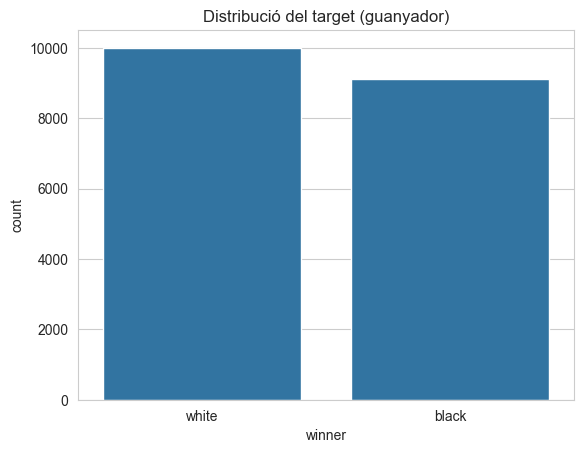

winner
white    0.523393
black    0.476607
Name: proportion, dtype: float64

In [9]:
df = df[df["winner"] != "draw"]
sns.countplot(data=df, x="winner")
plt.title("Distribució del target (guanyador)")
plt.show()

df["winner"].value_counts(normalize=True)

Ara analitzem les variables de ratings, per veure la seva distribució

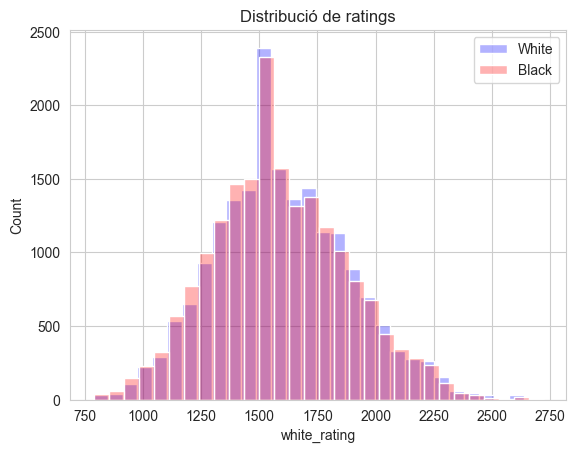

In [10]:
sns.histplot(df["white_rating"], bins=30, color="blue", alpha=0.3, label="White")
sns.histplot(df["black_rating"], bins=30, color="red",  alpha=0.3, label="Black")
plt.title("Distribució de ratings")
plt.legend()
plt.show()

Observem també ràpidament les apertures, per veure quants tipus en tenim i quines son les que mes es repeteixen. Com veiem que hi han masses tipus d'apertures diferents, les agruparem pel tipus d'apertura (no el seu codi propi), les agruparem segons si comencen per A, B, C, D, E (Millor explicat en el següent apartat)

In [11]:
df["opening_name"].value_counts()

opening_name
Van't Kruijs Opening                                                     352
Sicilian Defense                                                         343
Sicilian Defense: Bowdler Attack                                         283
Scotch Game                                                              260
French Defense: Knight Variation                                         256
                                                                        ... 
Italian Game: Scotch Gambit                                                1
English Opening: King's English Variation |  Taimanov Variation            1
Sicilian Defense: Najdorf Variation |  English Attack |  Anti-English      1
Ruy Lopez: Closed Variations |  Pilnik Variation                           1
Dutch Defense: Semi-Leningrad Variation                                    1
Name: count, Length: 1453, dtype: int64

In [12]:
df["opening_eco"].value_counts()

opening_eco
A00    968
C00    806
D00    701
B01    690
C41    663
      ... 
D77      1
C90      1
E35      1
E48      1
D19      1
Name: count, Length: 359, dtype: int64

In [13]:
df.to_csv('games_EDA.csv',index=False)